In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


file_path ="loan prediction.csv"
df = pd.read_csv(file_path)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
numerical_summary = loan_data.describe().transpose()

palette = sns.color_palette("viridis", as_cmap=True)

numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.000000,5403.459283,6109.041673,150.000000,2877.500000,3812.500000,5795.000000,81000.000000
CoapplicantIncome,614.000000,1621.245798,2926.248369,0.000000,0.000000,1188.500000,2297.250000,41667.000000
LoanAmount,592.000000,146.412162,85.587325,9.000000,100.000000,128.000000,168.000000,700.000000
Loan_Amount_Term,600.000000,342.000000,65.120410,12.000000,360.000000,360.000000,360.000000,480.000000
Credit_History,564.000000,0.842199,0.364878,0.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Check for missing values in each column
missing_data = loan_data.isnull().sum()

# Display columns with missing values (if any)
missing_data = missing_data[missing_data > 0]
missing_data


Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [18]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Shape of Dataset: (614, 13)

Data Types:
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Missing Values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

First 5 rows:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2

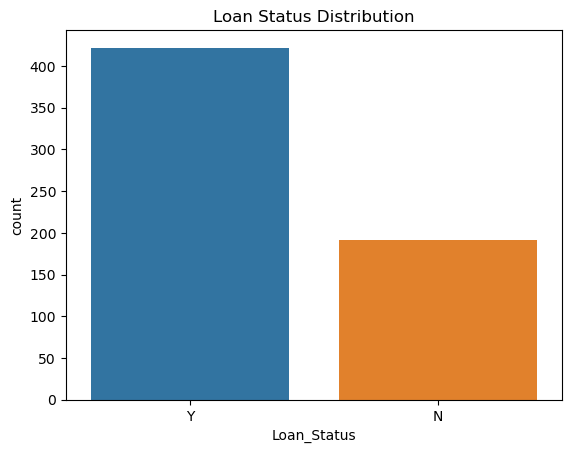

In [26]:
print("Shape of Dataset:",df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

print("\nFirst 5 rows:\n", df.head())

print("\nLoan Status Distribution:\n", df['Loan_Status'].value_counts())

sns.countplot(data=df, x='Loan_Status')
plt.title('Loan Status Distribution')
plt.show()




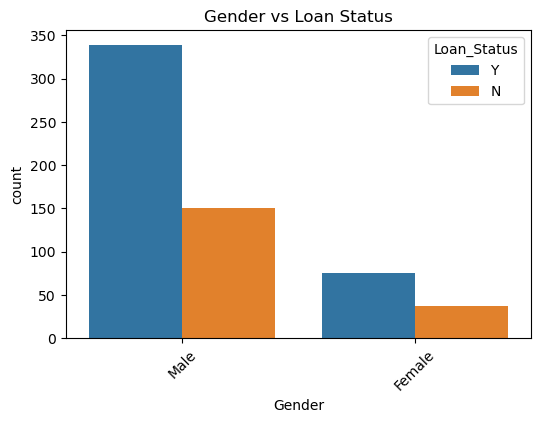

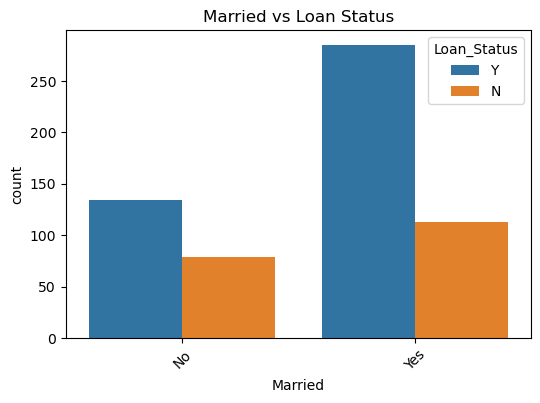

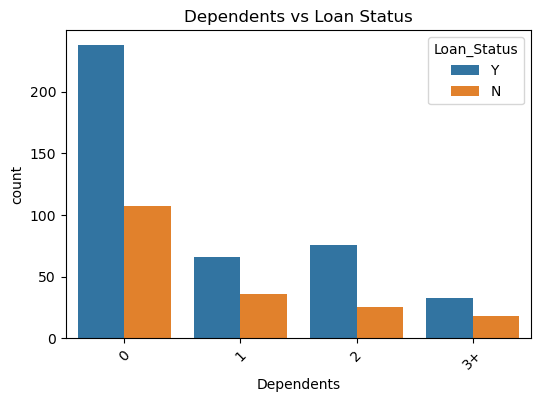

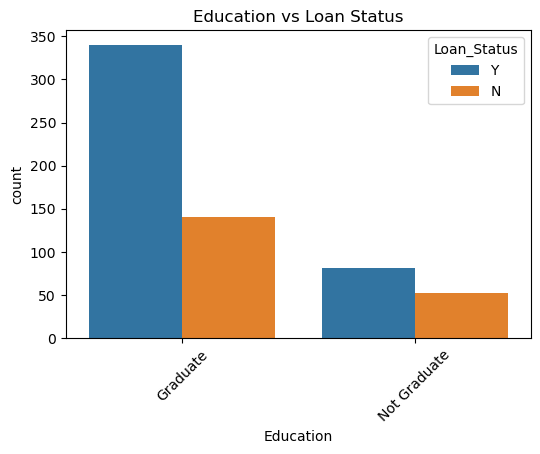

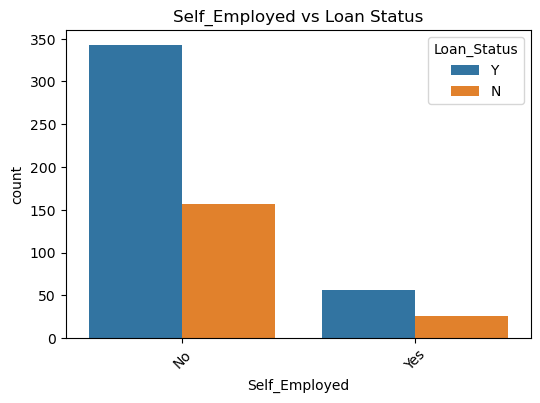

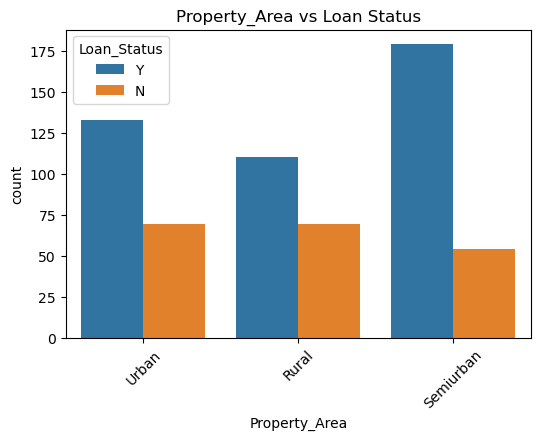

In [27]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Loan_Status')
    plt.title(f'{col} vs Loan Status')
    plt.xticks(rotation=45)
    plt.show()

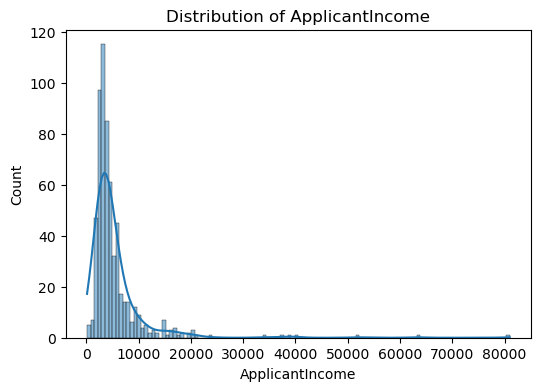

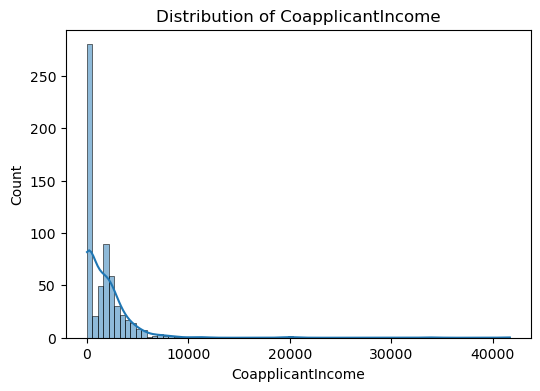

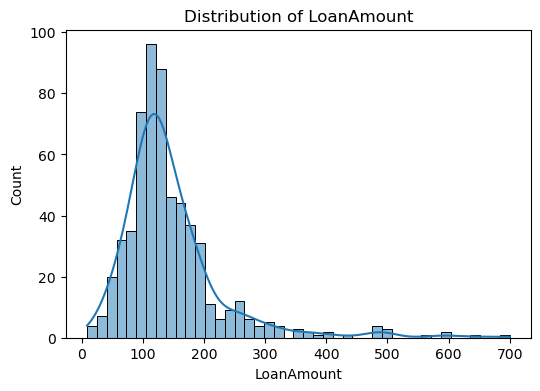

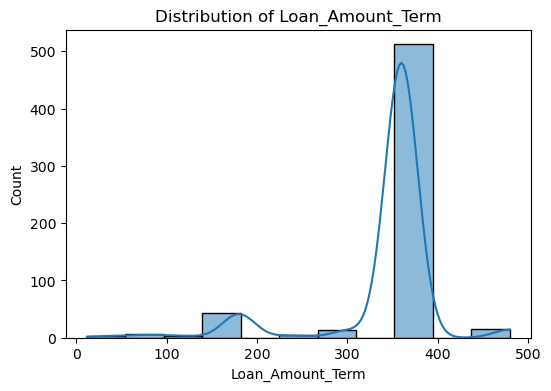

In [28]:
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

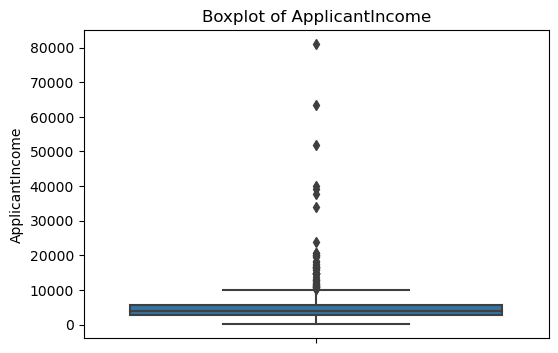

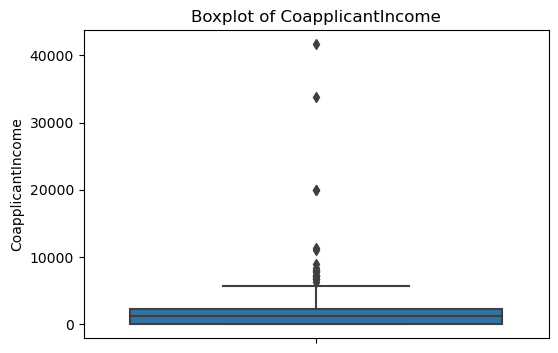

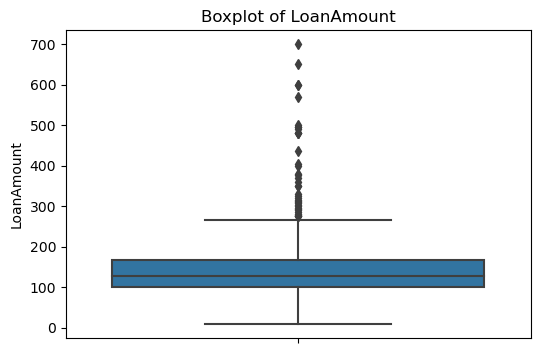

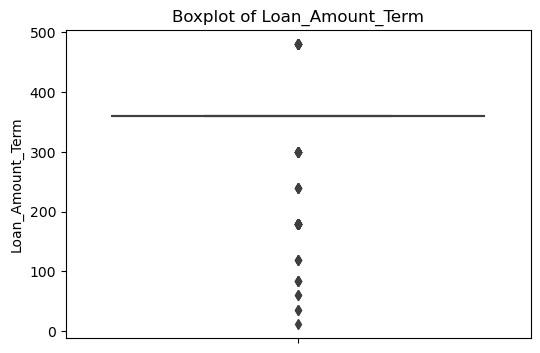

In [29]:
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


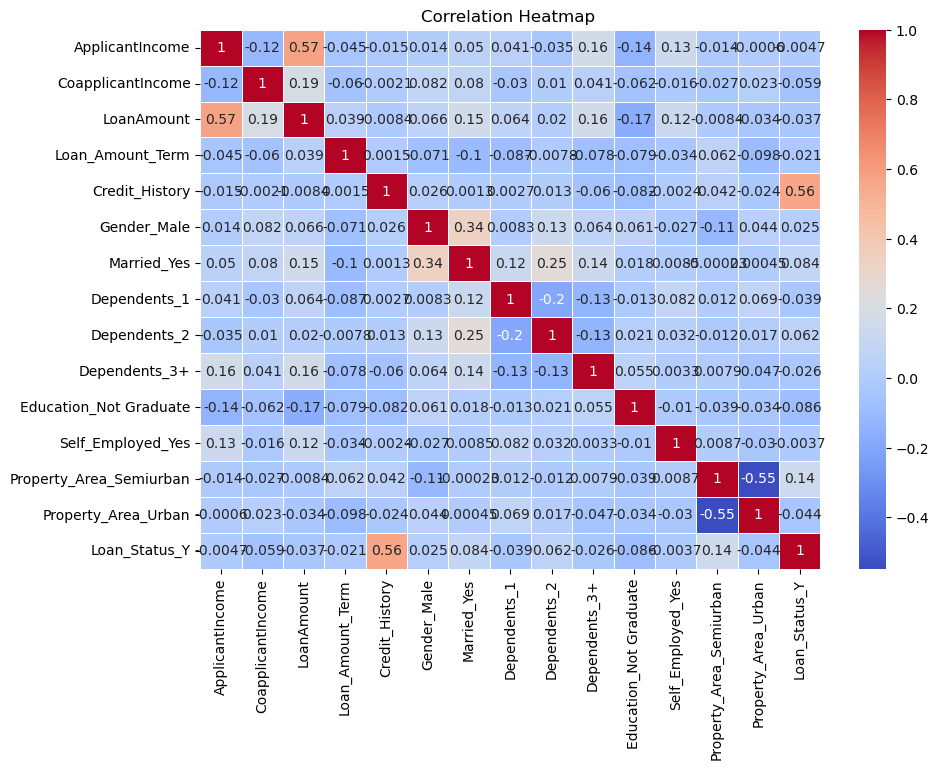

In [35]:
df_encoded = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(10,7))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap ')
plt.show()

In [7]:
# Implementing the suggested outlier handling strategy:

# Apply log transformation to features with heavy right-skewness
# Define a threshold for skewness
skewness_threshold = 1
for feature in non_boolean_numerical_features:
    if loan_data[feature].skew() > skewness_threshold:
        loan_data[f'{feature}_log'] = np.log1p(loan_data[feature])

# Identify and cap/floor the extreme values for numerical features
# Capping/Flooring at the 1st and 99th percentiles
for feature in non_boolean_numerical_features:
    lower_bound = loan_data[feature].quantile(0.01)
    upper_bound = loan_data[feature].quantile(0.99)
    loan_data[f'{feature}_capped'] = np.clip(loan_data[feature], lower_bound, upper_bound)

# Displaying the transformed data frame with additional columns for log-transformed and capped features
loan_data.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,installment_capped,log.annual.inc_capped,dti_capped,fico_capped,days.with.cr.line_capped,revol.bal_capped,revol.util_capped,inq.last.6mths_capped,delinq.2yrs_capped,pub.rec_capped
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,829.10,11.350407,19.48,737,5639.958333,28854.0,52.1,0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,228.22,11.082143,14.29,707,2760.000000,33623.0,76.7,0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,366.86,10.373491,11.63,682,4710.000000,3511.0,25.6,1,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,162.34,11.350407,8.10,712,2699.958333,33667.0,73.2,1,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,102.92,11.299732,14.97,667,4066.000000,4740.0,39.5,0,1.0,0


In [8]:
from sklearn.preprocessing import PolynomialFeatures

# 1. Interaction Terms - Example: Interaction between 'fico' and 'int.rate'
loan_data['fico_int_rate_interaction'] = loan_data['fico_capped'] * loan_data['int.rate_capped']

# 2. Polynomial Features - Example: Creating a squared term for 'dti'
pf = PolynomialFeatures(degree=2, include_bias=False)
dti_poly = pf.fit_transform(loan_data[['dti_capped']])
loan_data['dti_squared'] = dti_poly[:, 1]

# 3. Grouping and Aggregation - Example: Mean 'fico' score by 'purpose'
fico_mean_by_purpose = loan_data.groupby('purpose')['fico_capped'].mean().rename('mean_fico_by_purpose')
loan_data = loan_data.join(fico_mean_by_purpose, on='purpose')

# 4. Binning - Example: Binning 'fico' scores into categories
loan_data['fico_category'] = pd.cut(loan_data['fico_capped'], bins=[300, 630, 689, 719, 850], labels=['Bad', 'Fair', 'Good', 'Excellent'])
